# Hiring Process Analytics

## Below are the Contents of Project:

>1. <a href="#Description:">Description</a>
2. <a href="#Importing-Python-Packages:">Importing Python Packages</a>
3. <a href="#Describing-Dataset:">Describing Dataset</a>
4. <a href="#Data-Preprocessing:">Data Preprocessing</a>
5. <a href="#Analysis:">Analysis</a>

### Description:<br>
> Hiring process is the fundamental and the most important function of a company. Here, the MNCs get to know about the major underlying trends about the hiring process. Trends such as- number of rejections, number of interviews, types of jobs, vacancies etc. are important for a company to analyse before hiring freshers or any other individual.

>**You are required to provide a detailed report for the below data record mentioning the answers of the questions that follows:**<br>
You are given a dataset of a company where the details about people who registered for a particular post in a department of this company. You are required to use your knowledge in statistics and use different formulas in excel and draw necessary conclusions about the company.<br>

[<a href="#Hiring-Process-Analytics">Back to Top</a>]

<div class="alert alert-block alert-info">
<b>Note:</b>The entire Analysis was done with Python Packages and MS Excel
</div>

---

##### Importing Python Packages:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("C:/Users/kshit/Downloads/Statistics.xlsx - Sheet1.csv",parse_dates=["Interview Taken on"])

In [4]:
data

,application_id,Interview Taken on,Status,event_name,Department,Post Name,Offered Salary
0,383422,2014-05-01 11:40:00,Hired,Male,Service Department,c8,56553.0
1,907518,2014-05-06 08:08:00,Hired,Female,Service Department,c5,22075.0
2,176719,2014-05-06 08:08:00,Rejected,Male,Service Department,c5,70069.0
3,429799,2014-05-02 16:28:00,Rejected,Female,Operations Department,i4,3207.0
4,253651,2014-05-02 16:32:00,Hired,Male,Operations Department,i4,29668.0
...,...,...,...,...,...,...,...
7163,493131,2014-08-28 17:32:00,Hired,Male,Service Department,c9,49282.0
7164,214261,2014-08-31 01:36:00,Hired,Female,Service Department,c5,57742.0
7165,932441,2014-08-31 01:37:00,Hired,Male,Service Department,c5,69932.0
7166,39010,2014-08-31 01:38:00,Rejected,Male,Service Department,c5,14489.0


[<a href="#Hiring-Process-Analytics">Back to Top</a>]

---

### Describing Dataset:

In [5]:
data.size

50176

In [6]:
rows,columns=data.shape
print("Total Rows   : ", rows)
print("Total Columns: ", columns)

Total Rows   :  7168
Total Columns:  7


In [7]:
data.head(4)

,application_id,Interview Taken on,Status,event_name,Department,Post Name,Offered Salary
0,383422,2014-05-01 11:40:00,Hired,Male,Service Department,c8,56553.0
1,907518,2014-05-06 08:08:00,Hired,Female,Service Department,c5,22075.0
2,176719,2014-05-06 08:08:00,Rejected,Male,Service Department,c5,70069.0
3,429799,2014-05-02 16:28:00,Rejected,Female,Operations Department,i4,3207.0


In [8]:
data.tail(4)

,application_id,Interview Taken on,Status,event_name,Department,Post Name,Offered Salary
7164,214261,2014-08-31 01:36:00,Hired,Female,Service Department,c5,57742.0
7165,932441,2014-08-31 01:37:00,Hired,Male,Service Department,c5,69932.0
7166,39010,2014-08-31 01:38:00,Rejected,Male,Service Department,c5,14489.0
7167,686055,2014-08-26 12:14:00,Hired,Male,Operations Department,c5,54201.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7168 entries, 0 to 7167
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   application_id      7168 non-null   int64         
 1   Interview Taken on  7168 non-null   datetime64[ns]
 2   Status              7168 non-null   object        
 3   event_name          7168 non-null   object        
 4   Department          7168 non-null   object        
 5   Post Name           7168 non-null   object        
 6   Offered Salary      7167 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 392.1+ KB


In [10]:
# All the Objects in the Dataset. 

c_data=data.select_dtypes("object")
c_data

,Status,event_name,Department,Post Name
0,Hired,Male,Service Department,c8
1,Hired,Female,Service Department,c5
2,Rejected,Male,Service Department,c5
3,Rejected,Female,Operations Department,i4
4,Hired,Male,Operations Department,i4
...,...,...,...,...
7163,Hired,Male,Service Department,c9
7164,Hired,Female,Service Department,c5
7165,Hired,Male,Service Department,c5
7166,Rejected,Male,Service Department,c5


In [11]:
#All Numerical Value in the Dataset

d_data=data.select_dtypes(["int64","float64"])
d_data

,application_id,Offered Salary
0,383422,56553.0
1,907518,22075.0
2,176719,70069.0
3,429799,3207.0
4,253651,29668.0
...,...,...
7163,493131,49282.0
7164,214261,57742.0
7165,932441,69932.0
7166,39010,14489.0


[<a href="#Hiring-Process-Analytics">Back to Top</a>]

---

### Data Preprocessing:

In [12]:
#Changing the Column Name

data.rename(columns={"Interview Taken on":"Interview_Taken_on","Post Name":"Post_Name","Offered Salary":"Offered_Salary"},
            inplace=True)
data

,application_id,Interview_Taken_on,Status,event_name,Department,Post_Name,Offered_Salary
0,383422,2014-05-01 11:40:00,Hired,Male,Service Department,c8,56553.0
1,907518,2014-05-06 08:08:00,Hired,Female,Service Department,c5,22075.0
2,176719,2014-05-06 08:08:00,Rejected,Male,Service Department,c5,70069.0
3,429799,2014-05-02 16:28:00,Rejected,Female,Operations Department,i4,3207.0
4,253651,2014-05-02 16:32:00,Hired,Male,Operations Department,i4,29668.0
...,...,...,...,...,...,...,...
7163,493131,2014-08-28 17:32:00,Hired,Male,Service Department,c9,49282.0
7164,214261,2014-08-31 01:36:00,Hired,Female,Service Department,c5,57742.0
7165,932441,2014-08-31 01:37:00,Hired,Male,Service Department,c5,69932.0
7166,39010,2014-08-31 01:38:00,Rejected,Male,Service Department,c5,14489.0


In [13]:
# Removing not available values in Offered Salary with the mean of "Offered_Salary"
# Not much effect since there was only 1 value which was Not Available

data.fillna({"Offered_Salary":data["Offered_Salary"].mean()},inplace=True)

In [14]:
data.isnull().sum()

application_id        0
Interview_Taken_on    0
Status                0
event_name            0
Department            0
Post_Name             0
Offered_Salary        0
dtype: int64

In [15]:
#Describing Offered_Salary Column

data["Offered_Salary"].describe()

count      7168.000000
mean      49983.029022
std       28852.163831
min         100.000000
25%       25463.750000
50%       49628.000000
75%       74429.000000
max      400000.000000
Name: Offered_Salary, dtype: float64

In [16]:
d=data["application_id"].duplicated().sum()

In [17]:
# removing 27 duplicate values from the data on the basis of application_id column.

data.drop_duplicates(subset="application_id",keep="first",inplace=True)

In [18]:
data["application_id"].duplicated().sum()

0

##### Final Dataset

In [19]:
data

,application_id,Interview_Taken_on,Status,event_name,Department,Post_Name,Offered_Salary
0,383422,2014-05-01 11:40:00,Hired,Male,Service Department,c8,56553.0
1,907518,2014-05-06 08:08:00,Hired,Female,Service Department,c5,22075.0
2,176719,2014-05-06 08:08:00,Rejected,Male,Service Department,c5,70069.0
3,429799,2014-05-02 16:28:00,Rejected,Female,Operations Department,i4,3207.0
4,253651,2014-05-02 16:32:00,Hired,Male,Operations Department,i4,29668.0
...,...,...,...,...,...,...,...
7163,493131,2014-08-28 17:32:00,Hired,Male,Service Department,c9,49282.0
7164,214261,2014-08-31 01:36:00,Hired,Female,Service Department,c5,57742.0
7165,932441,2014-08-31 01:37:00,Hired,Male,Service Department,c5,69932.0
7166,39010,2014-08-31 01:38:00,Rejected,Male,Service Department,c5,14489.0


[<a href="#Hiring-Process-Analytics">Back to Top</a>]

---

### Analysis:

In [20]:
# Status count in the dataset 

data.Status.value_counts()

Hired       4679
Rejected    2462
Name: Status, dtype: int64

In [21]:
# Droping the rows from thw dataset where event name is "-"

data.drop(data[data["event_name"]=="-"].index,inplace=True)
data.event_name.value_counts()

Male                 4070
Female               2664
Don’t want to say     392
Name: event_name, dtype: int64

In [22]:
data.groupby(["Post_Name"]).Offered_Salary.agg(["mean","min","max"])

,mean,min,max
Post_Name,,,
-,85914.000000,85914.0,85914.0
b9,49847.287912,1105.0,200000.0
c-10,51244.359307,1817.0,99891.0
c5,50241.313003,1038.0,99948.0
c8,50747.257862,1035.0,99967.0
c9,50210.546884,1007.0,99953.0
i1,49937.954545,1519.0,99939.0
i4,48877.840909,1212.0,400000.0
i5,49467.559949,1304.0,98926.0


In [23]:
# Total Post Count on the basis of Post_Name

data.Post_Name.value_counts()

c9      1781
c5      1738
i7       976
i5       784
i6       527
b9       455
c8       318
c-10     231
i1       220
i4        88
m6         3
-          1
n10        1
m7         1
n9         1
n6         1
Name: Post_Name, dtype: int64

<div class="alert alert-block alert-warning">
<b>Imp:</b> Now below on are the visualisation done on the basis of question provided on the dataset.
</div>

#### Total Male and Female in the Data Set

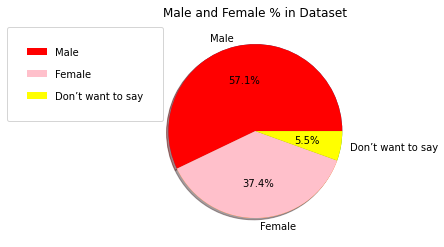

In [24]:
Gender="Male","Female","Don’t want to say"
total=data.event_name.value_counts()
colors=["Red","Pink","Yellow"]
explode=(0,0,0)
plt.pie(total)
explode=(0,0,0)
plt.pie(total,explode=explode,labels=Gender,colors=colors,autopct='%1.1f%%',shadow=True,startangle=360)
plt.title('Male and Female % in Dataset')
plt.legend(loc="upper right",handlelength=2, borderpad=2, labelspacing=1.2,bbox_to_anchor=(0.1, 1))
plt.show()

<div class="alert alert-block alert-danger">
<b>Insight:</b>
    <ul>
        <li>This is on the Gender from the entire dataset</li>
        <li>Male has more occurence upto 57.1%</li>
        <li>Female has occurence upto 37.4%</li>
        <li>Don't want to say are 5.5%</li>
    </ul>
</div>

Hiring: Process of intaking of people into an organization for different kinds of positions.
Your task: How many males and females are Hired ?
Average Salary: Adding all the salaries for a select group of employees and then dividing the sum by the number of employees in the group.
Your task: What is the average salary offered in this company ?
Class Intervals: The class interval is the difference between the upper class limit and the lower class limit.
Your task: Draw the class intervals for salary in the company ?
Charts and Plots: This is one of the most important part of analysis to visualize the data.
Your task: Draw Pie Chart / Bar Graph ( or any other graph ) to show proportion of people working different department ?
Charts: Use different charts and graphs to perform the task representing the data.
Your task: Represent different post tiers using chart/graph?

#### Hiring: Process of intaking of people into an organization for different kinds of positions. 
**Your task**: How many males and females are Hired ?

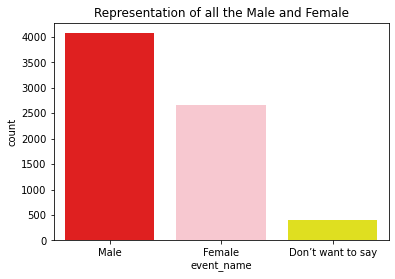

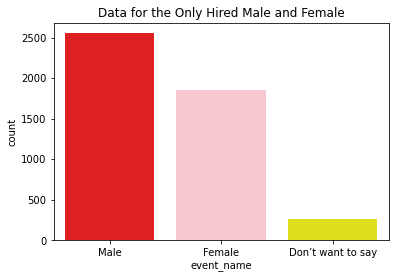

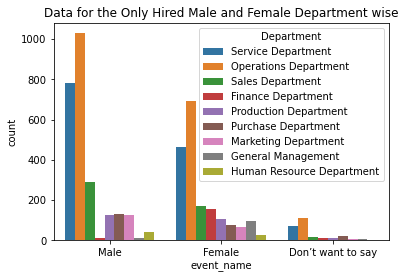

In [25]:
#Plotting data for all Male and Female.

plt.title("Representation of all the Male and Female")
p=["Red","Pink","Yellow"]
sns.countplot(x =data.event_name, data = data,palette=p)
plt.show()

# Filtering only Hired People and plotting it
c=data[data["Status"]=="Hired"]
plt.title("Data for the Only Hired Male and Female")
sns.countplot(x =c.event_name, data = data,palette=p)
plt.show()

# According to Department
c=data[data["Status"]=="Hired"]
plt.title("Data for the Only Hired Male and Female Department wise")
sns.countplot(x =c.event_name, data = data,hue="Department")
plt.show()

<div class="alert alert-block alert-danger">
<b>Insight:</b>
    <ul>
        <li>This is on the Gender Based on their hiring</li>
        <li>Male are more hired than Female in overall Dataset</li>
        <li>Department wise most hiring of male was done in Operations Department</li>
        <li>Department wise most hiring of female was done in Operations Department</li>
    </ul>
</div>

#### Average Salary: Adding all the salaries for a select group of employees and then dividing the sum by the number of employees in the group. 

**Your task**: What is the average salary for each post offered in this company ? 

In [26]:
df=data.groupby(["Post_Name"]).Offered_Salary.agg(["mean"])
df

,mean
Post_Name,
-,85914.000000
b9,49847.287912
c-10,51244.359307
c5,50241.313003
c8,50747.257862
c9,50210.546884
i1,49937.954545
i4,48877.840909
i5,49467.559949


In [27]:
df.max()

mean    85914.0
dtype: float64

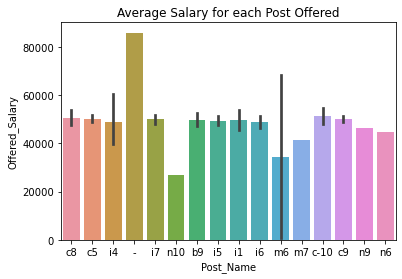

In [28]:
plt.title("Average Salary for each Post Offered")
z=data.Post_Name
zp=data.groupby(["Post_Name"]).Offered_Salary.mean()
sns.barplot(x=data.Post_Name,y=data.Offered_Salary,data=data)
plt.show()

<div class="alert alert-block alert-danger">
<b>Insight:</b>
    <ul>
        <li>This is on the Average Salary</li>
        <li>Most Average Salary for Post Name was "-"</li>
        <li>2nd higest Average Salary was for Post Name "c-10"</li>
        <li>Minimum Average Salary was for Post Name "n10"</li>
    </ul>
</div>

#### Class Intervals: The class interval is the difference between the upper class limit and the lower class limit. 
**Your task**: Draw the class intervals for salary in the company ? 

In [29]:
data["Offered_Salary"].describe()

count      7126.000000
mean      50018.106515
std       28828.268238
min         800.000000
25%       25605.750000
50%       49658.500000
75%       74418.500000
max      400000.000000
Name: Offered_Salary, dtype: float64

<Figure size 576x432 with 0 Axes>

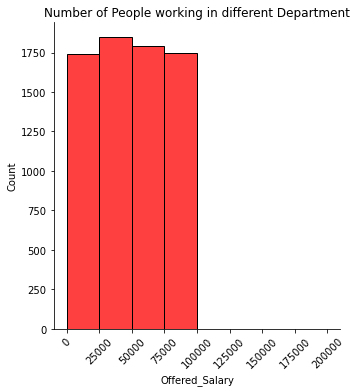

In [30]:
plt.figure(figsize=(8,6))
sns.displot(data["Offered_Salary"],bins=[0,25000,50000,75000,100000,125000,150000,175000,200000],color="red")
plt.title("Number of People working in different Department")
locs,labels=plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

<div class="alert alert-block alert-danger">
<b>Insight:</b>
    <ul>
        <li>This is on the Class Interval based on Salary</li>
        <li>Class Interval is between 0-25000, with every 25000</li>
        <li>25000-50000 has maximum count</li>
    </ul>
</div>

#### Charts and Plots: This is one of the most important part of analysis to visualize the data.* 
**Your task**: Draw Pie Chart / Bar Graph ( or any other graph ) to show proportion of people working different department 

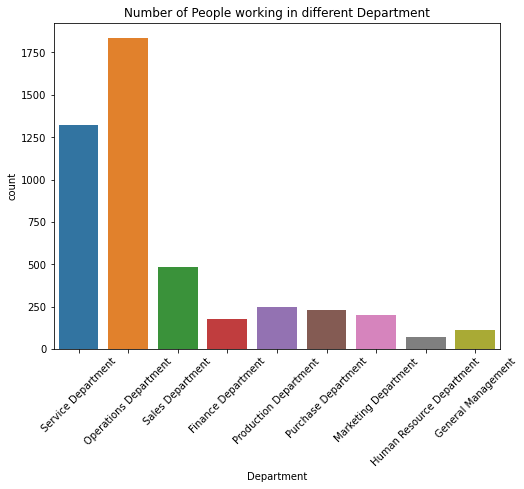

In [31]:
#It is for hired candidate

plt.figure(figsize=(8,6))
plt.title("Number of People working in different Department")
sns.countplot(x =c.Department, data = c)
locs,labels=plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

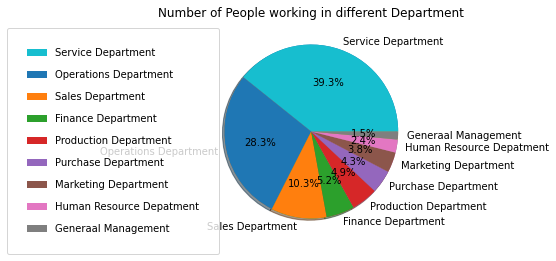

In [32]:
Dep=["Service Department","Operations Department","Sales Department","Finance Department",
     "Production Department","Purchase Department","Marketing Department", "Human Resource Depatment",
     "Generaal Management"]     
total=c.Department.value_counts()
explode=(0,0,0,0,0,0,0,0,0)
plt.pie(total)
explode=(0,0,0,0,0,0,0,0,0)
plt.pie(total,explode=explode,labels=Dep,autopct='%1.1f%%',shadow=True,startangle=360)
plt.title('Number of People working in different Department')
plt.legend(loc="upper right",handlelength=2, borderpad=2, labelspacing=1.2,bbox_to_anchor=(0.1, 1))
plt.show()

<div class="alert alert-block alert-danger">
<b>Insight:</b>
    <ul>
        <li>This is on the Number of People in different Department</li>
        <li>Operation Department has maximum number of Workers</li>
    </ul>
</div>

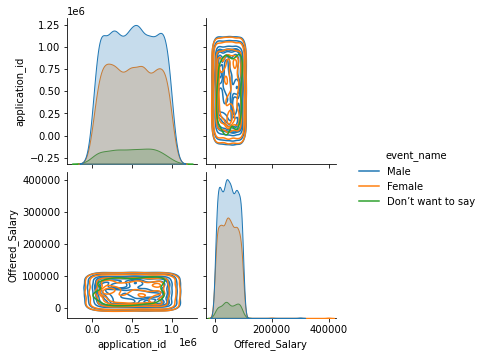

In [38]:
sns.pairplot(c,hue="event_name",kind="kde")
plt.show()

[<a href="#Hiring-Process-Analytics">Back to Top</a>]

---